In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/home/liy/anaconda3/envs/mlpython/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
from sklearn.decomposition import PCA
fpath = 'iris.data'

In [16]:
def readdata(file):
    df = pd.read_csv(file, header=None, names=list('12345'))
    return df.loc[:, '1':'4'].values, df['5'].values

In [34]:
def visulize():
    X, y = readdata(fpath)
    
    # decomposition data by SVD 
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)
    
    colors = ['b', 'g', 'r']
    fig = plt.figure(figsize=(7, 8))
    
    iris_class = np.unique(y).tolist()
    for clss, clr, lab in zip(iris_class, colors, iris_class):
        plt.scatter(X[y == clss, 0], X[y == clss, 1], c=clr, label=lab)
    
    plt.legend()
    
    plt.show()
    

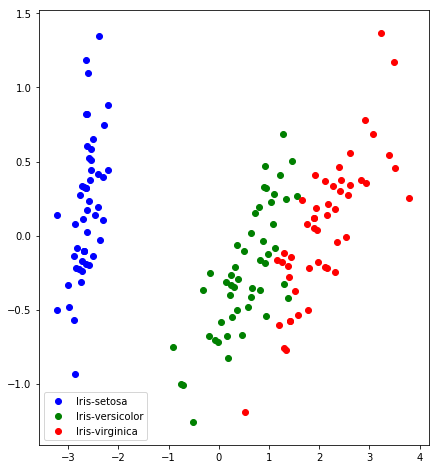

In [35]:
visulize()

In [55]:
# Decision Tree by sklearn
from sklearn.tree import DecisionTreeClassifier

def clf_():
    X, y = readdata(fpath)
    iris_class = np.unique(y).tolist()
    name_map = dict(zip(iris_class, range(3)))
    map2num = lambda cc: name_map[cc]
    
    # similar to map 
    vfunc = np.vectorize(map2num)
    y = vfunc(y)
    
    # decomposition on data
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)
    
    
    # visulization the boundary of classfication
    clf = DecisionTreeClassifier(max_depth=4)
    clf = clf.fit(X, y)
    
    x_max, x_min = X[:, 0].max()+1.0, X[:, 0].min()-1.0
    y_max, y_min = X[:, 1].max()+1.0, X[:, 1].min()-1.0
    sstep = 0.02
        
    xx, yy = np.meshgrid(np.arange(x_min, x_max, sstep),
                        np.arange(y_min, y_max, sstep))
    
    # np.c_ similar to zip on two rows , np.r_  similar to concat on two rows 
    # np.ravel similar to flatten
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    colors = ['b', 'g', 'r']
    
    for clss, clr, lab in zip([0, 1, 2], colors, iris_class):
        plt.scatter(X[y == clss, 0], X[y == clss, 1], c=clr, label=lab)
        
    plt.legend()
    plt.show()

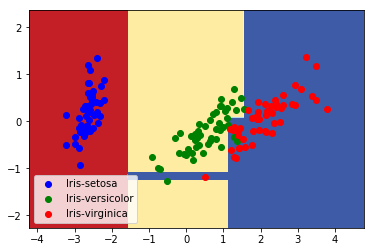

In [56]:
clf_()

In [64]:
# implement Decision Tree from scratch
def calc_shannon_ent(dataset):
    
    labels = dataset[:, -1]
    size = labels.shape[0]
    
    _, self_ent = np.unique(labels, return_counts=True)
    
    if len(self_ent) == 1:
        return 0.0
    
    self_ent = self_ent/size
    
    return -self_ent.dot(np.log2(self_ent))

In [65]:
def read_data(file):
    df = pd.read_csv(file, header=None)
    return df.values

In [70]:
def split_dataset(dataset, axis, value):
    samples, feats = dataset.shape
    assert axis <= feats-2
    
    col = dataset[:, axis]
    return dataset[col <= value], dataset[col > value]
    

In [86]:
# Decision Tree by CART algorithm
# Gini rate of the dataset
inf = np.Inf
def Gini_(dataset):
    _, count = np.unique(dataset[:, -1], return_counts=True)
    
    freq = count/count.sum()
    
    return 1 - np.square(freq).sum()

def label_(dataset):
    labels, count = np.unique(dataset[:, -1], return_counts=True)
    return labels[np.argmax(count)]

def cart_cut(dataset, thres, epsilon=1e-6):
    # calculate the origin gini rate of dataset
    ori_gini = Gini_(dataset)
    
    # if the origin_gini is small_enough return the dataset
    if ori_gini <= epsilon:
        return {'gini': ori_gini,
                'label': label_(dataset)}
    
    features = dataset.shape[-1] - 1
    bfeat = 0
    bgini = ori_gini
    bval = inf
    for feat in range(features):
        fcol = dataset[:, feat]
        # init the gini rate
        cur_gini = inf
        cur_val = inf
        for val in fcol:
            ldata, rdata = split_dataset(dataset, feat, val)
            spl_gini = Gini_(rdata)+Gini_(ldata)
            if cur_gini > spl_gini:
                cur_gini = spl_gini
                cur_val = val
        print('feature %s has done, the best gini rate is %.8f, the val is %.8f'%(feat, cur_gini, cur_val))
        
        if cur_gini < bgini:
            bgini = cur_gini
            bfeat = feat
            bval = cur_val
    
    
    if ori_gini - bgini >= thres:
        ldata, rdata = split_dataset(dataset, bfeat, bval)
        return {'gini': ori_gini,
                'feature': bfeat,
                'value': bval,
                'left': cart_cut(ldata, thres, epsilon),
                'right': cart_cut(rdata, thres, epsilon)}
    else:
        return {'gini': ori_gini,
                'label': label_(dataset)}
    
    

In [87]:
dataset = read_data(fpath)
cart_tree = cart_cut(dataset, thres=1e-7, epsilon=1e-8)

feature 0 has done, the best gini rate is 0.65716195, the val is 4.80000000
feature 1 has done, the best gini rate is 0.66550926, the val is 3.80000000
feature 2 has done, the best gini rate is 0.50000000, the val is 1.90000000
feature 3 has done, the best gini rate is 0.50000000, the val is 0.60000000
feature 0 has done, the best gini rate is 0.49070248, the val is 7.00000000
feature 1 has done, the best gini rate is 0.49952173, the val is 3.40000000
feature 2 has done, the best gini rate is 0.23783696, the val is 4.70000000
feature 3 has done, the best gini rate is 0.21057149, the val is 1.70000000
feature 0 has done, the best gini rate is 0.13955144, the val is 7.00000000
feature 1 has done, the best gini rate is 0.17087932, the val is 3.30000000
feature 2 has done, the best gini rate is 0.10872781, the val is 5.10000000
feature 3 has done, the best gini rate is 0.19013128, the val is 1.00000000
feature 0 has done, the best gini rate is 0.11072664, the val is 6.90000000
feature 1 ha

In [88]:
from pprint import pprint
pprint(cart_tree)

{'feature': 2,
 'gini': 0.66666666666666674,
 'left': {'gini': 0.0, 'label': 'Iris-setosa'},
 'right': {'feature': 3,
           'gini': 0.5,
           'left': {'feature': 2,
                    'gini': 0.16803840877914955,
                    'left': {'gini': 0.10872781065088755,
                             'label': 'Iris-versicolor'},
                    'right': {'gini': 0.0, 'label': 'Iris-virginica'},
                    'value': 5.1},
           'right': {'gini': 0.042533081285444307, 'label': 'Iris-virginica'},
           'value': 1.7},
 'value': 1.9}


In [91]:
def predict(tree, d):
    if 'label' in tree:
        return tree['label']
    else:
        feat = tree['feature']
        val = tree['value']
        subtree = tree['left'] if d[feat] <= val else tree['right']
        return predict(subtree, d)
        

In [96]:
def predict_(data):
    return [predict(cart_tree, d) for d in data]

In [97]:
X, y = dataset[:, :-1], dataset[:, -1]
pre_y = predict_(X)
precise = (pre_y==y).sum() / len(pre_y)

In [99]:
from numpy.linalg import norm

In [106]:
# k-NN
# calculate the Euler distance
def distance_(xi, xc):
    xi, xc = np.array(xi), np.array(xc)
    return norm(xi-xc)

def maj_vote(yset):
    return np.bincount(yset).argmax()
    

In [101]:
# implement KD-search-tree

class Node:
    
    def __init__(self, data=None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        
    @property
    def is_leaf(self):
        return self.data is None or all(bool(c) for c, _ in self.children)
    
    @property
    def children(self):
        if self.left:
            yield self.left, 0
        if self.right:
            yield self.right, 1
    
    def preorder(self):
        '''
        retrieve the tree by preorder
        '''
        if not self:
            return
        
        yield self
        
        if self.left:
            for x in self.left.preorder():
                yield x
        
        if self.right:
            for x in self.right.preorder():
                yield x
    
    def inorder(self):
        '''
        inorder : left, self, right
        '''     
        if not self:
            return
        
        if self.left:
            for x in self.left.inorder():
                yield x
        
        yield self
        
        if self.right:
            for x in self.right.inorder():
                yield x
    
    def postorder(self):
        '''
        opstorder : left right self
        '''
        if not self:
            return
        
        if self.left:
            for x in self.left.postorder():
                yield x
        
        if self.right:
            for x in self.right.postorder():
                yield x
        
        yield self
        
    def height(self):
        
        min_height = int(bool(self))
        
        return max([min_height] + [c.height()+1 for c, _ in self.children])
    
    def __repr__(self):
        return "<{node}: {data}>".format(node=self.__class__, data=repr(self.data))
    
    def __nonzero__(self):
        return self.data is not None
    
    __bool__ = __nonzero__
    

def KDNode(Node):
    
    def __init__(self, data=None, left=None, right=None, axis=None, sel_axis=None, dimensions=None):
        '''
        axis : split axis of current node
        sel_axis: split axis of children node
        '''
        super(KDNode, self).__init__(data, left, right)
        
        self.axis = axis
        self.sel_axis = sel_axis
        self.dimensions = dimensions
        
    def search_knn(self, point, k, dist=None):
        '''
        return k nearest neighbors of points and distance
        '''
        if k < 1:
            raise 'the k must bigger than 0'
            
        dist = dist or lambda n: distance_(n.data, )
        
        results = []
        
        self._search_node(point, k, results, )
        

def create(points, dimensions=None, axis=0, sel_axis=None):
    '''
    create kd-tree from the poinst 
    '''
    dimensions = check_dimension(points, dimensions) # self check the dimension of the points
    
    # initiate the rule of generate the next axis
    sel_axis = sel_axis or lambda prev: (prev + 1)%dimensions
    
    if not points:
        return KDNode(axis=axis, sel_axis=sel_axis, dimensions=dimensions)
    
    # create the kd-tree
    point_list = list(points)
    point_list = sorted(point_list, key: lambda x: x[axis])
    median = len(point_list) // 2
    
    loc = point_list[median]
    left = create(point_list[:median], dimensions, sel_axis(axis))
    right = create(point_list[median+1:], dimensions, sel_axis(axis))
    
    return KDNode(loc, left, right, axis=axis, sel_axis=sel_axis, dimensions=dimensions)    


def check_dimension(points, dimensions=None):
    
    dimensions = dimensions or len(points[0])
    
    for i, p in enumerate(points):
        if len(p) != dimensions:
            raise ValueError("the %s-th value of the point has invalid dimension"%(i))
            
    return dimensions
            
    
        
    

3

In [105]:
'{node}'.format(node=)

'12'